# Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline
from datetime import datetime

In [2]:
!pip install nsepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for nsepy: filename=nsepy-0.8-py3-none-any.whl size=36084 sha256=d562562f785b6de1f2944e23fe66c6ebdfc1134c369d329dcd7ead5844758993
  Stored in directory: /root/.cache/pip/wheels/32/ab/d9/78ceea14cdf6de83376082b3cb0c2999fd77f823e35c47b9ec
Successfully built nsepy


In [3]:
import pandas as pd
import nsepy
import datetime

# Data Extraction

**Importing dataset**

In [4]:
from datetime import date
end_date=datetime.date.today()
def extract(name):
  data=nsepy.get_history(symbol=name,start=date(2005,1,1),end=end_date)
  return data

In [5]:
df_sbi=extract('SBIN')
df_axis=extract('AXIS BANK LIMITED')
df_maruti=extract('MARUTI SUZUKI INDIA LIMITED')

In [6]:
df_al=extract('ASHOK LEYLAND LIMITED')

# Dataset

In [7]:
df_maruti.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,


In [8]:
df_al.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,


In [9]:
df_sbi.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2005-01-03,SBIN,EQ,652.00,654.50,662.90,650.10,657.0,655.75,656.76,2131452,1.399851e+14,NaN,399911.0,0.1876
2005-01-04,SBIN,EQ,655.75,658.85,658.90,646.15,651.0,649.90,651.35,2472630,1.610536e+14,NaN,274312.0,0.1109
2005-01-05,SBIN,EQ,649.90,649.95,655.80,591.00,615.8,617.45,625.10,4919738,3.075329e+14,NaN,592714.0,0.1205
2005-01-06,SBIN,EQ,617.45,615.25,628.90,596.15,604.0,604.30,612.49,4502406,2.757690e+14,NaN,293856.0,0.0653
2005-01-07,SBIN,EQ,604.30,609.40,619.95,605.25,615.9,615.65,613.27,2923563,1.792921e+14,NaN,176542.0,0.0604


In [10]:
df_axis.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2005-01-03,UTIBANK,EQ,185.20,185.00,191.00,185.00,190.95,190.20,188.89,284202,5.368259e+12,NaN,191822,0.6749
2005-01-04,UTIBANK,EQ,190.20,191.10,192.00,187.00,191.50,189.70,189.29,223165,4.224233e+12,NaN,147676,0.6617
2005-01-05,UTIBANK,EQ,189.70,189.95,189.95,177.55,184.90,184.25,183.78,232617,4.274973e+12,NaN,150070,0.6451
2005-01-06,UTIBANK,EQ,184.25,184.10,190.00,177.00,182.00,185.15,182.76,238522,4.359124e+12,NaN,131421,0.5510
2005-01-07,UTIBANK,EQ,185.15,180.65,191.90,180.65,190.75,190.10,186.11,306052,5.695810e+12,NaN,235959,0.7710


# Plot

**PLOTS**

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
features = ['Close','Open','High','Low','Prev Close']

TypeError: ignored

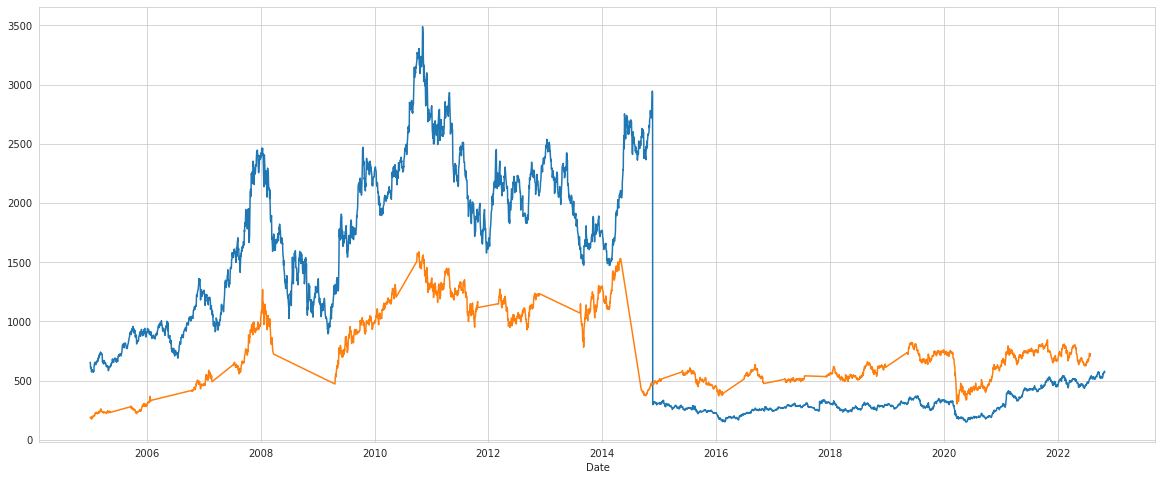

In [13]:
for i in features:
    plt.figure(figsize=(20,8))
    df_sbi[i].plot(label='SBI')
    df_axis[i].plot(label='AXIS')
    df_maruti[i].plot(label='maruti')
    df_al[i].plot(label='Ashok leyland')
    plt.title(i)
    plt.legend()
    plt.show()

**Extracting data in CSV format**

In [ ]:
df_sbi.to_csv('sbi.csv')
df_maruti.to_csv('Maruti.csv')
df_axis.to_csv('AXIS.csv')
df_al.to_csv('Ashok leyland.csv')

# EDA

**EDA**

In [ ]:
datas=[df_sbi,df_maruti,df_axis,df_al]#Data Frames
names=['SBI','Maruti','AXIS','Ashok leyland']

In [ ]:
#Removing all the unnecessary columns
for i in datas:
  i=i.drop(['Series','VWAP','Trades','Deliverable Volume','%Deliverble','Turnover'],axis=1,inplace=True)

**Describing the data set**

In [ ]:
df_maruti.describe()

In [ ]:
df_axis.describe()

In [ ]:
df_maruti.describe()

In [ ]:
df_al.describe()

In [ ]:
df_sbi.index

In [ ]:
Companies = [df_maruti, df_al, df_sbi, df_axis]
Companies_Title = ["Maruti", "Ashok Leyland", "SBI", "AXIS Bank"]

In [ ]:
for company in Companies:
  company["Daily Return"] = company['Close'].pct_change()

In [ ]:
for company in Companies:
  company['Date'] = company.index

In [ ]:
plt.figure(figsize=(20, 12))
for index, company in enumerate(Companies):
  plt.subplot(3, 2, index + 1)
  plt.plot(company["Date"], company["Daily Return"])
  plt.title(Companies_Title[index])
  plt.ylabel('Daily Return')

In [ ]:
plt.figure(figsize=(20, 15))
for index, company in enumerate(Companies):
  plt.subplot(3, 2, index + 1)
  sns.distplot(company["Daily Return"].dropna(), color = "purple")
  plt.title(Companies_Title[index])

**Checking for null values**

In [ ]:
#Info 
import warnings
warnings.filterwarnings('ignore')
for i in range(0,len(datas)):
  print('\n Stock Name: {}\n'.format(names[i]))
  datas[i].info()

There are no null values in the data set.

In [ ]:
df_sbi

**Setting index position**

In [ ]:
#Coverting the return type of the date column
df_sbi['Date']=pd.to_datetime(df_sbi['Date'])
df_axis['Date']=pd.to_datetime(df_axis['Date'])
df_maruti['Date']=pd.to_datetime(df_maruti['Date'])
df_al['Date']=pd.to_datetime(df_al['Date'])

In [ ]:
#Resetting index postion with date column
df_sbi.set_index('Date',inplace=True)
df_axis.set_index('Date',inplace=True)
df_al.set_index('Date',inplace=True)
df_maruti.set_index('Date',inplace=True)

# **Time Series resampling**

Comparison of min and max close price year wise

**SBI**

In [ ]:
#Comparison of max and min close price year wise
plt.figure(figsize=(15,5))
df_sbi.resample(rule='A').min()['Close'].plot(label='Min')    #Resampling to week level and the criterion for resampling is min
df_sbi.resample(rule='A').max()['Close'].plot(label='Max')
plt.legend()
plt.title('SBI: Close price V/S Year',color='Blue',fontsize=15)

**AXIS Bank**

In [ ]:
plt.figure(figsize=(15,5))
df_axis.resample(rule='A').min()['Close'].plot(label='Min')    #Resampling to week level and the criterion for resampling is min
df_axis.resample(rule='A').max()['Close'].plot(label='Max')
plt.legend()
plt.title('AXIS: Close price V/S Year',color='Blue',fontsize=15)

In [ ]:
plt.figure(figsize=(15,5))
df_al.resample(rule='A').min()['Close'].plot(label='Min')    #Resampling to week level and the criterion for resampling is min
df_al.resample(rule='A').max()['Close'].plot(label='Max')
plt.legend()
plt.title('ASHOK LEYLAND: Close price V/S Year',color='Blue',fontsize=15)

In [ ]:
plt.figure(figsize=(15,5))
df_maruti.resample(rule='A').min()['Close'].plot(label='Min')    #Resampling to week level and the criterion for resampling is min
df_maruti.resample(rule='A').max()['Close'].plot(label='Max')
plt.legend()
plt.title('MARUTI: Close price V/S Year',color='Blue',fontsize=15)

In [ ]:
#Resampling the data into week basis
sbi=df_sbi.resample(rule='w').mean()
maruti=df_maruti.resample(rule='w').mean()
al=df_al.resample(rule='w').mean()
axis=df_axis.resample(rule='w').mean()

**After Downsampling**

In [ ]:
sbi.info()

In [ ]:
maruti.info()

In [ ]:
al.info()

In [ ]:
axis.info()

# Rolling average

**Smoothing**

In [ ]:
#For loop to get rolling average
company_name=[sbi,axis,maruti,al]   #list which holds the data frame 
for i in company_name:
  i['5 Week rolling average']=i['Close'].rolling(5).mean()

In [ ]:
name=['SBI','AXIS BANK','MARUTI','ASHOK LEYLAND']
plt.figure(figsize=(20,20))
for i in range(0,4):
  plt.subplot(4,1,i+1)
  company_name[i]['5 Week rolling average'].plot(color='blue',label='Close 5 week rolling average')
  company_name[i]['Close'].plot(label='Close',color='red')
  plt.title(name[i])
  plt.legend()

# Decomposition Plots

In [ ]:
#Maruti
from statsmodels.tsa.seasonal import seasonal_decompose
decomp=seasonal_decompose(df_maruti.Close,freq=5)
decomp.plot()
plt.show()

Show an overall non linear increasing trend.
No seasonality is observed.


In [ ]:
#Ashok leyland
decomp=seasonal_decompose(df_al.Close,freq=5)
decomp.plot()
plt.show()

Gradual increasing trend can be observed.
There is no seasonal effects on the close price

In [ ]:
#AXIS
decomp=seasonal_decompose(df_axis.Close,freq=5)
decomp.plot()
plt.show()

In [ ]:
decomp=seasonal_decompose(df_sbi.Close,freq=5)
decomp.plot()
plt.show()

# Box plots

In [ ]:
sbi_=df_sbi.reset_index()
maruti_=df_maruti.reset_index()
axis_bank=df_axis.reset_index()
ashok=df_al.reset_index()

In [ ]:
#Creating month columns
sbi_['month']=pd.DatetimeIndex(sbi_['Date']).month
maruti_['month']=pd.DatetimeIndex(maruti_['Date']).month
axis_bank['month']=pd.DatetimeIndex(axis_bank['Date']).month
ashok['month']=pd.DatetimeIndex(ashok['Date']).month

In [ ]:
#Creating year columns
sbi_['year']=pd.DatetimeIndex(sbi_['Date']).year
maruti_['year']=pd.DatetimeIndex(maruti_['Date']).year
axis_bank['year']=pd.DatetimeIndex(axis_bank['Date']).year
ashok['year']=pd.DatetimeIndex(ashok['Date']).year

In [ ]:
c_name=[sbi_,maruti_,axis_bank,ashok]
c_names=['SBI','Maruti','Axis bank','Ashok leyland']
plt.figure(figsize=(15,15))
for i in range(0,len(c_name)):
  plt.subplot(2,2,i+1)
  sns.boxplot(x='month',y='Close',data=c_name[i])
  plt.title(c_names[i])

In [ ]:
plt.figure(figsize=(25,15))
for i in range(0,len(c_name)):
  plt.subplot(2,2,i+1)
  sns.boxplot(x='year',y='Close',data=c_name[i])
  plt.title(c_names[i])

In [ ]:
plt.figure(figsize=(10,10))
for i in range(0,len(c_name)):
  plt.subplot(2,2,i+1)
  sns.boxplot(c_name[i]['Close'])
  plt.title(c_names[i])

# Pivot table

In [ ]:
def pivot_table(df):
  pvt_tbl=df.pivot_table(index='year',columns='month',values='Close')
  plt.figure(figsize=(15,20))
  pvt_tbl.fillna(0)
  return sns.heatmap(pvt_tbl,annot=True,fmt='g')

In [ ]:
pivot_table(sbi_)
plt.title('SBI')

In [ ]:
pivot_table(maruti_)
plt.title('Maruti')

In [ ]:
pivot_table(axis_bank)
plt.title('AXIS Bank')

In [ ]:
pivot_table(ashok)
plt.title('Ashok leyland')

# **Pre-processing**

Taking the close price alone

In [ ]:
sbi=sbi.reset_index()
axis=axis.reset_index()
maruti=maruti.reset_index()
al=al.reset_index()

In [ ]:
#Creating a DataFrame for the model building
stock=pd.DataFrame()
stock['Date']=sbi['Date']
stock['sbi']=sbi['Close']
stock['axis']=axis['Close']
stock['maruti']=maruti['Close']
stock['ashok_leyland']=al['Close']

**Transformation**

In [ ]:
stock["month"] = stock.Date.dt.strftime("%b") # month extraction
stock["year"] = stock.Date.dt.strftime("%Y")  #year extraction
stock['time']=pd.Series(range(1,len(stock)+1))  #creating time index for prediction 1 unit is 1 week
stock['time_sq']=stock['time']*stock['time']  #creating time square columns for quadratic model
stock['sbi_log']=np.log(stock['sbi'])         #taking log for exponential model
stock['axis_log']=np.log(stock['axis'])
stock['maruti_log']=np.log(stock['maruti'])
stock['ashok_log']=np.log(stock['ashok_leyland'])

In [ ]:
month=pd.get_dummies(stock['month'])          #creating dummies for seasonality 
stock=pd.concat([stock,month],axis=1)       
stock.drop(['month'],axis=1,inplace=True)       

In [ ]:
stock

**Splitting the data**

In [ ]:
x1=int(len(stock)*.8)
x2=int(len(stock)-x1)
print(x1,x2)

In [ ]:
#train =80% test 20%
train=stock.head(x1)
test=stock.tail(x2)

In [ ]:
train.head()

# Model based methods

# Linear model

In [ ]:
#evaluation metrics
from sklearn.metrics import mean_squared_error

In [ ]:
#Ploting function
score=[]
name=[]
def plot(a,b):
  plt.plot(a,label='Actual')
  plt.plot(b,label='Predicted')
  plt.legend()
  return plt

In [ ]:
#Linear model
#sbi
import statsmodels.formula.api as smf
linear_model=smf.ols('sbi~time',data=train).fit()
pred=linear_model.predict(test['time'])
rmse=np.sqrt(mean_squared_error(pred,test['sbi']))
score.append(rmse)
name.append('Linear_sbi')
print('RMSE:=',rmse)
plot(test['sbi'],pred)

In [ ]:
#Axis bank
linear_model=smf.ols('axis~time',data=train).fit()
pred=linear_model.predict(test['time'])
rmse=np.sqrt(mean_squared_error(pred,test['axis']))
score.append(rmse)
name.append('Linear_axis')
print('RMSE:=',rmse)
plot(test['axis'],pred)

In [ ]:
#maruti bank
linear_model=smf.ols('maruti~time',data=train).fit()
pred=linear_model.predict(test['time'])
rmse=np.sqrt(mean_squared_error(pred,test['maruti']))
score.append(rmse)
name.append('Linear_maruti')
print('RMSE:=',rmse)
plot(test['maruti'],pred)

In [ ]:
#Ashok leyland
linear_model=smf.ols('ashok_leyland~time',data=train).fit()
pred=linear_model.predict(test['time'])
rmse=np.sqrt(mean_squared_error(pred,test['ashok_leyland']))
score.append(rmse)
name.append('Linear_leyland')
print('RMSE:=',rmse)
plot(test['ashok_leyland'],pred)

# Exponential Model

In [ ]:
#SBI
exp=smf.ols('sbi_log~time',data=train).fit()
pred=exp.predict(test['time'])
rmse=np.sqrt(mean_squared_error(pred,test['sbi']))
score.append(rmse)
name.append('Exponential_sbi')
print('RMSE:=',rmse)
plot(test['sbi'],pred)

In [ ]:
#AXIS
exp=smf.ols('axis_log~time',data=train).fit()
pred=exp.predict(test['time'])
rmse=np.sqrt(mean_squared_error(pred,test['axis']))
score.append(rmse)
name.append('Exponential_Axis')
print('RMSE:=',rmse)
plot(test['axis'],pred)

In [ ]:
#Maruti
exp=smf.ols('maruti_log~time',data=train).fit()
pred=exp.predict(test['time'])
rmse=np.sqrt(mean_squared_error(pred,test['maruti']))
score.append(rmse)
name.append('Exponential_maruti')
print('RMSE:=',rmse)
plot(test['maruti'],pred)

In [ ]:
#Ashok leyland
exp=smf.ols('ashok_log~time',data=train).fit()
pred=exp.predict(test['time'])
rmse=np.sqrt(mean_squared_error(pred,test['ashok_leyland']))
score.append(rmse)
name.append('Exponential_leyland')
print('RMSE:=',rmse)
plot(test['ashok_leyland'],pred)

# Quadratic model

In [ ]:
#SBI
quadratic=smf.ols('sbi~time+time_sq',data=train).fit()
pred=quadratic.predict(test[['time','time_sq']])
rmse=np.sqrt(mean_squared_error(pred,test['sbi']))
score.append(rmse)
name.append('Quadratic_sbi')
print('RMSE:=',rmse)
plot(test['sbi'],pred)

In [ ]:
#Axis
quadratic=smf.ols('axis~time+time_sq',data=train).fit()
pred=quadratic.predict(test[['time','time_sq']])
rmse=np.sqrt(mean_squared_error(pred,test['axis']))
score.append(rmse)
name.append('Quadratic_axis')
print('RMSE:=',rmse)
plot(test['axis'],pred)

In [ ]:
#Axis
quadratic=smf.ols('maruti~time+time_sq',data=train).fit()
pred=quadratic.predict(test[['time','time_sq']])
rmse=np.sqrt(mean_squared_error(pred,test['maruti']))
score.append(rmse)
name.append('Quadratic_maruti')
print('RMSE:=',rmse)
plot(test['maruti'],pred)

In [ ]:
#Ashok leyland
quadratic=smf.ols('ashok_leyland~time+time_sq',data=train).fit()
pred=quadratic.predict(test[['time','time_sq']])
rmse=np.sqrt(mean_squared_error(pred,test['ashok_leyland']))
score.append(rmse)
name.append('Quadratic_ashok_leyland')
print('RMSE:=',rmse)
plot(test['ashok_leyland'],pred)

# Additive seasonality

In [ ]:
#SBI
add_season=smf.ols('sbi~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred=pd.Series(add_season.predict(pd.DataFrame(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']])))
rmse=np.sqrt(mean_squared_error(pred,test['sbi']))
score.append(rmse)
name.append('additive_ seasonality SBI')
print('RMSE:=',rmse)
plot(test['sbi'],pred)

In [ ]:
#Axis
add_season=smf.ols('axis~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred=pd.Series(add_season.predict(pd.DataFrame(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']])))
rmse=np.sqrt(mean_squared_error(pred,test['axis']))
score.append(rmse)
name.append('additive_ seasonality Axis')
print('RMSE:=',rmse)
plot(test['axis'],pred)

In [ ]:
#Maruti
add_season=smf.ols('maruti~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred=pd.Series(add_season.predict(pd.DataFrame(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']])))
rmse=np.sqrt(mean_squared_error(pred,test['maruti']))
score.append(rmse)
name.append('additive_ seasonality Axis')
print('RMSE:=',rmse)
plot(test['maruti'],pred)

In [ ]:
#Ashok leyland
add_season=smf.ols('ashok_leyland~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred=pd.Series(add_season.predict(pd.DataFrame(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']])))
rmse=np.sqrt(mean_squared_error(pred,test['ashok_leyland']))
score.append(rmse)
name.append('additive_ seasonality Axis')
print('RMSE:=',rmse)
plot(test['ashok_leyland'],pred)

# Additive seasonality quadratic

In [ ]:
#SBI
add_season_quadratic=smf.ols('sbi~time+time_sq+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred=pd.Series(add_season_quadratic.predict(pd.DataFrame(test[['time','time_sq','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']])))
rmse=np.sqrt(mean_squared_error(pred,test['sbi']))
score.append(rmse)
name.append('additive_ seasonality quadratic sbi')
print('RMSE:=',rmse)
plot(test['sbi'],pred)

In [ ]:
#Axis
add_season_quadratic=smf.ols('axis~time+time_sq+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred=pd.Series(add_season_quadratic.predict(pd.DataFrame(test[['time','time_sq','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']])))
rmse=np.sqrt(mean_squared_error(pred,test['axis']))
score.append(rmse)
name.append('additive_ seasonality quadratic axis')
print('RMSE:=',rmse)
plot(test['axis'],pred)

In [ ]:
#Maruti
add_season_quadratic=smf.ols('maruti~time+time_sq+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred=pd.Series(add_season_quadratic.predict(pd.DataFrame(test[['time','time_sq','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']])))
rmse=np.sqrt(mean_squared_error(pred,test['maruti']))
score.append(rmse)
name.append('additive_ seasonality quadratic maruti')
print('RMSE:=',rmse)
plot(test['maruti'],pred)

In [ ]:
#Ashok leyland
add_season_quadratic=smf.ols('ashok_leyland~time+time_sq+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred=pd.Series(add_season_quadratic.predict(pd.DataFrame(test[['time','time_sq','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']])))
rmse=np.sqrt(mean_squared_error(pred,test['ashok_leyland']))
score.append(rmse)
name.append('additive_ seasonality ashok_leyland')
print('RMSE:=',rmse)
plot(test['ashok_leyland'],pred)

# Multiplicative seasonality

In [ ]:
#SBI
Mul_Add_sea = smf.ols('sbi_log~time+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = train).fit()
pred = pd.Series(Mul_Add_sea.predict(test))
rmse=np.sqrt(mean_squared_error(pred,test['sbi']))
score.append(rmse)
name.append('additive_ seasonality quadratic sbi')
print('RMSE:=',rmse)
plot(test['sbi'],pred)

In [ ]:
#Axis
Mul_Add_sea = smf.ols('axis_log~time+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = train).fit()
pred = pd.Series(Mul_Add_sea.predict(test))
rmse=np.sqrt(mean_squared_error(pred,test['axis']))
score.append(rmse)
name.append('Multiplicative_ seasonality axis')
print('RMSE:=',rmse)
plot(test['axis'],pred)

In [ ]:
#maruti
Mul_Add_sea = smf.ols('maruti_log~time+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = train).fit()
pred = pd.Series(Mul_Add_sea.predict(test))
rmse=np.sqrt(mean_squared_error(pred,test['maruti']))
score.append(rmse)
name.append('Multiplicative_ seasonality maruti')
print('RMSE:=',rmse)
plot(test['maruti'],pred)

In [ ]:
#Ashok leyland
Mul_Add_sea = smf.ols('ashok_log~time+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = train).fit()
pred = pd.Series(Mul_Add_sea.predict(test))
rmse=np.sqrt(mean_squared_error(pred,test['ashok_leyland']))
score.append(rmse)
name.append('Multiplicative_ seasonality ashok_leyland')
print('RMSE:=',rmse)
plot(test['ashok_leyland'],pred)

# Simple exponential method

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing,Holt,ExponentialSmoothing

In [ ]:
#SBI
ses=SimpleExpSmoothing(stock['sbi']).fit(smoothing_level=.8)
pred=ses.predict(start=test.index[0],end=test.index[-1])
rmse=np.sqrt(mean_squared_error(pred,test['sbi']))
score.append(rmse)
name.append('Simple exponential smoothing_ sbi')
print('RMSE:=',rmse)
plot(test['sbi'],pred)

In [ ]:
#Axis
ses=SimpleExpSmoothing(stock['axis']).fit(smoothing_level=.85)
pred=ses.predict(start=test.index[0],end=test.index[-1])
rmse=np.sqrt(mean_squared_error(pred,test['axis']))
score.append(rmse)
name.append('Simple exponential smoothing_ axis')
print('RMSE:=',rmse)
plot(test['axis'],pred)

In [ ]:
#maruti
ses=SimpleExpSmoothing(stock['maruti']).fit(smoothing_level=.15)
pred=ses.predict(start=test.index[0],end=test.index[-1])
rmse=np.sqrt(mean_squared_error(pred,test['maruti']))
score.append(rmse)
name.append('Simple exponential smoothing_ maruti')
print('RMSE:=',rmse)
plot(test['maruti'],pred)

In [ ]:
#ashok leyland
ses=SimpleExpSmoothing(stock['ashok_leyland']).fit(smoothing_level=.15)
pred=ses.predict(start=test.index[0],end=test.index[-1])
rmse=np.sqrt(mean_squared_error(pred,test['ashok_leyland']))
score.append(rmse)
name.append('Simple exponential smoothing_ ashok_leyland')
print('RMSE:=',rmse)
plot(test['ashok_leyland'],pred)

# Holt method

In [ ]:
#sbi
hw=Holt(train['sbi']).fit(smoothing_level=.6,smoothing_slope=.15)
pred=hw.predict(start=test.index[0],end=test.index[-1])
rmse=np.sqrt(mean_squared_error(pred,test['sbi']))
score.append(rmse)
name.append('Holt sbi')
print('RMSE:=',rmse)
plot(test['sbi'],pred)

In [ ]:
#Axis
hw=Holt(train['axis']).fit(smoothing_level=.6,smoothing_slope=.15)
pred=hw.predict(start=test.index[0],end=test.index[-1])
rmse=np.sqrt(mean_squared_error(pred,test['axis']))
score.append(rmse)
name.append('Holt axis')
print('RMSE:=',rmse)
plot(test['axis'],pred)

In [ ]:
#maruti
hw=Holt(train['maruti']).fit(smoothing_level=.6,smoothing_slope=.15)
pred=hw.predict(start=test.index[0],end=test.index[-1])
rmse=np.sqrt(mean_squared_error(pred,test['maruti']))
score.append(rmse)
name.append('Holt maruti')
print('RMSE:=',rmse)
plot(test['maruti'],pred)

In [ ]:
#ashok leyland
hw=Holt(train['ashok_leyland']).fit(smoothing_level=.6,smoothing_slope=.15)
pred=hw.predict(start=test.index[0],end=test.index[-1])
rmse=np.sqrt(mean_squared_error(pred,test['ashok_leyland']))
score.append(rmse)
name.append('Holt ashok_leyland')
print('RMSE:=',rmse)
plot(test['ashok_leyland'],pred)

# Holt winter with additive seasonality and additive trend

In [ ]:
#sbi
hwe_add=ExponentialSmoothing(train['sbi'],seasonal='add',trend='add',seasonal_periods=4).fit()
pred=hw.predict(start=test.index[0],end=test.index[-1])
rmse=np.sqrt(mean_squared_error(pred,test['sbi']))
score.append(rmse)
name.append('Holt winter sbi')
print('RMSE:=',rmse)
plot(test['sbi'],pred)

In [ ]:
#axis
hwe_add=ExponentialSmoothing(train['axis'],seasonal='add',trend='add',seasonal_periods=4).fit()
pred=hw.predict(start=test.index[0],end=test.index[-1])
rmse=np.sqrt(mean_squared_error(pred,test['axis']))
score.append(rmse)
name.append('Holt winter axis')
print('RMSE:=',rmse)
plot(test['axis'],pred)

In [ ]:
#maruti
hwe_add=ExponentialSmoothing(train['maruti'],seasonal='add',trend='add',seasonal_periods=4).fit()
pred=hw.predict(start=test.index[0],end=test.index[-1])
rmse=np.sqrt(mean_squared_error(pred,test['maruti']))
score.append(rmse)
name.append('Holt winter maruti')
print('RMSE:=',rmse)
plot(test['maruti'],pred)

In [ ]:
#ashok leyland
hwe_add=ExponentialSmoothing(train['ashok_leyland'],seasonal='add',trend='add',seasonal_periods=4).fit()
pred=hw.predict(start=test.index[0],end=test.index[-1])
rmse=np.sqrt(mean_squared_error(pred,test['ashok_leyland']))
score.append(rmse)
name.append('Holt winter ashok_leyland')
print('RMSE:=',rmse)
plot(test['ashok_leyland'],pred)

# Navie model

**SBI**

In [ ]:
train=stock['sbi'].head(744).values
test=stock['sbi'].tail(186).values
history=[x for x in train]
history
predictions =[]
for i in range(len(test)):
  yhat = history[-1]
  predictions.append(yhat)
# observation
  obs = test[i]
  history.append(obs)
  print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = np.sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

**Axis**

In [ ]:
train=stock['axis'].head(744).values
test=stock['axis'].tail(186).values
history=[x for x in train]
history
predictions =[]
for i in range(len(test)):
  yhat = history[-1]
  predictions.append(yhat)
# observation
  obs = test[i]
  history.append(obs)
  print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = np.sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

**Maruti**

In [ ]:
train=stock['maruti'].head(744).values
test=stock['maruti'].tail(186).values
history=[x for x in train]
history
predictions =[]
for i in range(len(test)):
  yhat = history[-1]
  predictions.append(yhat)
# observation
  obs = test[i]
  history.append(obs)
  print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = np.sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

**ashok leyland**

In [ ]:
train=stock['ashok_leyland'].head(744).values
test=stock['ashok_leyland'].tail(186).values
history=[x for x in train]
history
predictions =[]
for i in range(len(test)):
  yhat = history[-1]
  predictions.append(yhat)
# observation
  obs = test[i]
  history.append(obs)
  print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = np.sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

# ARIMA

In [ ]:
# grid search ARIMA parameters for a time series

import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [ ]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score)) 

In [ ]:
import warnings
# evaluate parameters
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")

In [ ]:
#SBI
train=stock['sbi'].head(744).values
test=stock['sbi'].tail(186).values
#evaluate_models(train, p_values, d_values, q_values)     #Best ARIMA(1, 0, 1) RMSE=101.214

In [ ]:
#Axis
train=stock['axis'].head(744).values
test=stock['axis'].tail(186).values
#evaluate_models(train, p_values, d_values, q_values)         #Best ARIMA(1, 0, 0) RMSE=90.375

In [ ]:
#Maruti
train=stock['maruti'].head(744).values
test=stock['maruti'].tail(186).values
#evaluate_models(train, p_values, d_values, q_values)       #Best ARIMA(0, 1, 1) RMSE=136.388

In [ ]:
#ashok leyland
train=stock['ashok_leyland'].head(744).values
test=stock['ashok_leyland'].tail(186).values
#evaluate_models(train, p_values, d_values, q_values)         #Best ARIMA(1, 1, 1) RMSE=3.064

In [ ]:
#manually appending the score
score.append(101.214)
name.append('ARIMA sbi')
score.append(90.375)
name.append('ARIMA Axis bank')
score.append(136.388)
name.append('ARIMA maruti')
score.append(3.064)
name.append('ARIMA ashok leyland')

# FBprophet

In [ ]:
!pip install pystan~=2.14
!pip install fbprophet

In [ ]:
from fbprophet import Prophet
def fbprof_model(data,stock_name):
  df=pd.DataFrame()
  #data frame
  df['ds']=data['Date']
  df['ds']=pd.to_datetime(df['ds'])
  df['y']=data[stock_name]
  #splitting for validation
  train_size=int(len(df)*.85)
  test_size=int(len(df)*.15)
  train=df.head(train_size)
  test=df.tail(test_size)
  #model building
  model=Prophet(weekly_seasonality=True)
  model.fit(train)
  #Creating the dates for predictions
  future_dates=model.make_future_dataframe(periods=test_size,freq='W')    #predictions for test _size  weeks freq=week basis
  predictions=model.predict(future_dates)
  #evaluation
  rmse=np.sqrt(mean_squared_error(test['y'],predictions['yhat'].tail(test_size)))
  score.append(rmse)
  mod='Fbprophet'+'  '+stock_name
  name.append(mod)
  print('RMSE:=',rmse)
  plot(test['y'],predictions['yhat'].tail(test_size))
  model.plot(predictions)
  model.plot_components(predictions)

In [ ]:
fbprof_model(stock,'sbi') #241.

In [ ]:
fbprof_model(stock,'axis')  #203

In [ ]:
fbprof_model(stock,'maruti')#2039

In [ ]:
fbprof_model(stock,'ashok_leyland')

# LSTM

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
def lstm(data,stock_name):
  df=pd.DataFrame()
  df[stock_name]=data[stock_name]
  #Scaling operation
  from sklearn.preprocessing import MinMaxScaler
  scaler=MinMaxScaler(feature_range=(0,1))
  df=scaler.fit_transform(np.array(df).reshape(-1,1))
  ##splitting dataset into train and test split
  training_size=int(len(df)*0.75)
  test_size=len(df)-training_size
  train_data,test_data=df[0:training_size,:],df[training_size:len(df),:]
  # reshape into X=t,t+1,t+2,t+3 and Y=t+4
  time_step = 100
  X_train, y_train = create_dataset(train_data, time_step)
  X_test, ytest = create_dataset(test_data, time_step)
  # reshape input to be [samples, time steps, features] which is required for LSTM
  X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
  X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
  #model building
  model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)
  ### Lets Do the prediction and check performance metrics
  train_predict=model.predict(X_train)
  test_predict=model.predict(X_test)
  ##Transformback to original form
  train_predict=scaler.inverse_transform(train_predict)
  test_predict=scaler.inverse_transform(test_predict)
  np.sqrt(mean_squared_error(y_train,train_predict))
  rmse=np.sqrt(mean_squared_error(ytest,test_predict))
  #score
  score.append(rmse)
  mod='LSTM model '+stock_name
  name.append(mod)
  print('RMSE:========>>>>>>>',rmse)

In [ ]:
#def lstm(data,stock_name):
  df=pd.DataFrame()
  df[stock_name]=data[stock_name]
  #Scaling operation
  from sklearn.preprocessing import MinMaxScaler
  scaler=MinMaxScaler(feature_range=(0,1))
  df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
  #splitting the data
  training_size=int(len(df_sbi)*.75)
  test_size=int(len(df_sbi)*.25)
  train_data,test_data=df[0:training_size,:],df[training_size:,:]
  # reshape into X=t,t+1,t+2,t+3 and Y=t+4
  time_step = 100
  X_train, y_train = create_dataset(train_data, time_step)
  X_test, ytest = create_dataset(test_data, time_step)
  # reshape input to be [samples, time steps, features] which is required for LSTM
  X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
  X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
  #model building
  model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)
  ### Lets Do the prediction and check performance metrics
  train_predict=model.predict(X_train)
  test_predict=model.predict(X_test)
  ##Transformback to original form
  train_predict=scaler.inverse_transform(train_predict)
  test_predict=scaler.inverse_transform(test_predict)
  np.sqrt(mean_squared_error(y_train,train_predict))
  rmse=np.sqrt(mean_squared_error(ytest,test_predict))
  #score
  score.append(rmse)
  mod='LSTM model '+stock_name
  name.append(mod)
  print('RMSE:========>>>>>>>',rmse)

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
lstm(stock,'sbi')

In [ ]:
lstm(stock,'axis')

In [ ]:
lstm(stock,'maruti')

In [ ]:
lstm(stock,'ashok_leyland')

# Score

In [ ]:
scoring=pd.DataFrame()
scoring['Name']=name
scoring['Score']=score

In [ ]:
scoring.sort_values('Score')

# Final scoring

In [ ]:
score_axis=pd.DataFrame()
score_sbi=pd.DataFrame()
score_maruti=pd.DataFrame()
score_ashok=pd.DataFrame()

In [ ]:
score_axis=scoring[scoring['Name'].str.contains(r'axis')]
score_sbi=scoring[scoring['Name'].str.contains(r'sbi')]
score_maruti=scoring[scoring['Name'].str.contains(r'maruti')]
score_ashok=scoring[scoring['Name'].str.contains(r'leyland')]

In [ ]:
scoring

In [ ]:
#sbi bank
score_sbi.sort_values('Score')

In [ ]:
#Axis bank
score_axis.sort_values('Score')

In [ ]:
#maruti bank
score_maruti.sort_values('Score')

In [ ]:
#maruti bank
score_ashok.sort_values('Score')

# Final model